# Diagnosis and DIA (Data Inspection Assistant)

If you cannot import this module, please try: pip install "polars_ds[plot]"

The dataset used for dependency detection can be found on github, at examples/dependency.parquet

The plotly plots cannot be rendered on github.

In [1]:
import polars as pl
import polars_ds as pds
from polars_ds.diagnosis import DIA

In [2]:
df = pds.frame(size=1_000_000).select(
    pds.random(0.0, 12.0).alias("uniform_1"),
    pds.random(0.0, 1.0).alias("uniform_2"),
    pds.random_exp(0.5).alias("exp"),
    pds.random_normal(0.0, 1.0).alias("normal"),
    pds.random_normal(0.0, 1000.0).alias("fat_normal"),
).with_columns(
    pl.concat_list("uniform_2", 1 - pl.col("uniform_2")).alias("list_prob")
)
df.head()

uniform_1,uniform_2,exp,normal,fat_normal,list_prob
f64,f64,f64,f64,f64,list[f64]
6.791467,0.283161,0.777444,-0.568004,491.394955,"[0.283161, 0.716839]"
0.276134,0.408202,3.863593,-2.438353,-160.146634,"[0.408202, 0.591798]"
3.002214,0.26685,2.834594,1.727347,-130.782322,"[0.26685, 0.73315]"
3.103055,0.627046,1.193838,0.107552,392.246007,"[0.627046, 0.372954]"
11.138852,0.980313,0.234841,0.240036,1009.132124,"[0.980313, 0.019687]"


In [3]:
dia = DIA(df)

In [4]:
dia.special_values_report()

column,null_count,null%,NaN_count,NaN%,inf_count,Inf%
str,u32,f64,u32,f64,u32,f64
"""uniform_1""",0,0.0,0,0.0,0,0.0
"""uniform_2""",0,0.0,0,0.0,0,0.0
"""exp""",0,0.0,0,0.0,0,0.0
"""normal""",0,0.0,0,0.0,0,0.0
"""fat_normal""",0,0.0,0,0.0,0,0.0


In [5]:
# Only shows for numerical columns
dia.numeric_profile(histogram=True)

GT(_tbl_data=shape: (5, 13)
┌────────────┬────────────┬───────┬──────────┬───┬────────────┬────────────┬───────────┬───────────┐
│ column     ┆ non_null_c ┆ null% ┆ mean     ┆ … ┆ max        ┆ IQR        ┆ outlier_c ┆ histogram │
│ ---        ┆ nt         ┆ ---   ┆ ---      ┆   ┆ ---        ┆ ---        ┆ nt        ┆ ---       │
│ str        ┆ ---        ┆ f64   ┆ f64      ┆   ┆ f64        ┆ f64        ┆ ---       ┆ struct[1] │
│            ┆ u32        ┆       ┆          ┆   ┆            ┆            ┆ u32       ┆           │
╞════════════╪════════════╪═══════╪══════════╪═══╪════════════╪════════════╪═══════════╪═══════════╡
│ uniform_1  ┆ 1000000    ┆ 0.0   ┆ 6.003015 ┆ … ┆ 11.999996  ┆ 6.004953   ┆ 0         ┆ {[50087,  │
│            ┆            ┆       ┆          ┆   ┆            ┆            ┆           ┆ 49933, …  │
│            ┆            ┆       ┆          ┆   ┆            ┆            ┆           ┆ 50327]}   │
│ uniform_2  ┆ 1000000    ┆ 0.0   ┆ 0.49933  ┆ … ┆ 0.999999   ┆ 0.499751   ┆ 0         ┆ {[50265,  │
│            ┆            ┆       ┆          ┆   ┆            ┆            ┆           ┆ 50526, …  │
│            ┆            ┆       ┆          ┆   ┆            ┆            ┆           ┆ 49800]}   │
│ exp        ┆ 1000000    ┆ 0.0   ┆ 2.000617 ┆ … ┆ 29.329002  ┆ 2.198114   ┆ 48003     ┆ {[519706, │
│            ┆            ┆       ┆          ┆   ┆            ┆            ┆           ┆ 249181, … │
│            ┆            ┆       ┆          ┆   ┆            ┆            ┆           ┆ 1]}       │
│ normal     ┆ 1000000    ┆ 0.0   ┆ 0.000649 ┆ … ┆ 5.11653    ┆ 1.351107   ┆ 7001      ┆ {[25,     │
│            ┆            ┆       ┆          ┆   ┆            ┆            ┆           ┆ 203, …    │
│            ┆            ┆       ┆          ┆   ┆            ┆            ┆           ┆ 2]}       │
│ fat_normal ┆ 1000000    ┆ 0.0   ┆ 2.502748 ┆ … ┆ 4862.19002 ┆ 1348.80531 ┆ 6972      ┆ {[6, 27,  │
│            ┆            ┆       ┆          ┆   ┆ 9          ┆ 5          ┆           ┆ … 8]}     │
└────────────┴────────────┴───────┴──────────┴───┴────────────┴────────────┴───────────┴───────────┘, _body=<great_tables._gt_data.Body object at 0x7594825f52e0>, _boxhead=Boxhead([ColInfo(var='column', type=<ColInfoTypeEnum.stub: 2>, column_label='column', column_align='left', column_width=None), ColInfo(var='non_null_cnt', type=<ColInfoTypeEnum.default: 1>, column_label='non_null_cnt', column_align='center', column_width=None), ColInfo(var='null%', type=<ColInfoTypeEnum.default: 1>, column_label='null%', column_align='right', column_width=None), ColInfo(var='mean', type=<ColInfoTypeEnum.default: 1>, column_label='mean', column_align='right', column_width=None), ColInfo(var='std', type=<ColInfoTypeEnum.default: 1>, column_label='std', column_align='right', column_width=None), ColInfo(var='min', type=<ColInfoTypeEnum.default: 1>, column_label='min', column_align='right', column_width=None), ColInfo(var='q1', type=<ColInfoTypeEnum.default: 1>, column_label='q1', column_align='right', column_width=None), ColInfo(var='median', type=<ColInfoTypeEnum.default: 1>, column_label='median', column_align='right', column_width=None), ColInfo(var='q3', type=<ColInfoTypeEnum.default: 1>, column_label='q3', column_align='right', column_width=None), ColInfo(var='max', type=<ColInfoTypeEnum.default: 1>, column_label='max', column_align='right', column_width=None), ColInfo(var='IQR', type=<ColInfoTypeEnum.default: 1>, column_label='IQR', column_align='right', column_width=None), ColInfo(var='outlier_cnt', type=<ColInfoTypeEnum.default: 1>, column_label='outlier_cnt', column_align='center', column_width=None), ColInfo(var='histogram', type=<ColInfoTypeEnum.default: 1>, column_label='histogram', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x759482d1b200>, _spanners=Spanners([]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead='column', _source_notes=[], _footnotes=[], _st

In [6]:
# Don't compute histogram. Use Polars as output format instead of GT
dia.numeric_profile(histogram=False, gt=False) 

column,non_null_cnt,null%,mean,std,min,q1,median,q3,max,IQR,outlier_cnt
str,u32,f64,f64,f64,f64,f64,f64,f64,f64,f64,u32
"""uniform_1""",1000000,0.0,6.003015,3.466974,0.000018,2.998867,6.0,9.00382,11.999996,6.004953,0
"""uniform_2""",1000000,0.0,0.49933,0.28869,1.4642e-7,0.249562,0.5,0.749313,0.999999,0.499751,0
"""exp""",1000000,0.0,2.000617,2.001901,0.000001,0.576303,1.39,2.774417,29.329002,2.198114,48003
"""normal""",1000000,0.0,0.000649,1.001123,-4.430495,-0.67543,0.0,0.675677,5.11653,1.351107,7001
"""fat_normal""",1000000,0.0,2.502748,1000.484535,-5002.916261,-671.089755,3.18,677.71556,4862.190029,1348.805315,6972


In [7]:
dia.infer_corr()

x,y,corr
str,str,f64
"""exp""","""fat_normal""",-0.001651
"""uniform_2""","""fat_normal""",-0.001265
"""exp""","""normal""",-0.001144
"""uniform_1""","""fat_normal""",0.001003
"""uniform_1""","""uniform_2""",0.000689
"""uniform_2""","""exp""",-0.000492
"""uniform_1""","""normal""",0.000479
"""uniform_1""","""exp""",0.000167
"""uniform_2""","""normal""",0.000147


In [8]:
dia.infer_corr(method="kendall")

x,y,corr
str,str,f64
"""exp""","""fat_normal""",-0.001254
"""exp""","""normal""",-0.000856
"""uniform_2""","""fat_normal""",-0.000708
"""uniform_1""","""fat_normal""",0.000601
"""uniform_1""","""normal""",0.000567
"""uniform_2""","""exp""",-0.000484
"""uniform_1""","""uniform_2""",0.00046
"""uniform_1""","""exp""",0.00019
"""normal""","""fat_normal""",-0.000051


In [9]:
dia.meta()

{'numerics': ['uniform_1', 'uniform_2', 'exp', 'normal', 'fat_normal'],
 'ints': [],
 'floats': ['uniform_1', 'uniform_2', 'exp', 'normal', 'fat_normal'],
 'strs': [],
 'bools': [],
 'cats': [],
 'list_floats': ['list_prob'],
 'list_bool': [],
 'list_str': [],
 'list_ints': [],
 'simple_types': ['uniform_1',
  'uniform_2',
  'exp',
  'normal',
  'fat_normal',
  'list_prob'],
 'other_types': []}

In [10]:
# Uniform_2 can potentially be a probability score column (e.g. output of predict_proba, but taking values only for class =1)
# list_prob can potentially be a 2-class probability column (e.g. output of predict_proba)
dia.infer_prob()

['uniform_2', 'list_prob']

# Dependency Detection, Null Distributions, Distribution Comparisons

Does knowing values in column A tell us values in column B?

In [11]:
df = pl.read_parquet("dependency.parquet")
df.head()

ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
str,str,str,str,str,str,str,str,i64,f64,str,str,str,str,str,f64,i64,i64,f64,i64,i64,i64
"""APPC90493171225""","""Female""","""23/07/79""","""15/07/16""","""C10001""","""A""","""COM0044082""","""A""",4,2000.0,"""B001""","""P""","""N""","""S122""","""G""",0.0,null,null,null,null,0,0
"""APPD40611263344""","""Male""","""07/12/86""","""04/07/16""","""C10003""","""A""","""COM0000002""","""C""",1,3500.0,"""B002""","""P""","""Y""","""S122""","""G""",0.0,20000,2,13.25,953,10,0
"""APPE70289249423""","""Male""","""10/12/82""","""19/07/16""","""C10125""","""C""","""COM0005267""","""C""",4,2250.0,"""B003""","""G""","""Y""","""S143""","""B""",0.0,45000,4,null,null,0,0
"""APPF80273865537""","""Male""","""30/01/89""","""09/07/16""","""C10477""","""C""","""COM0004143""","""A""",4,3500.0,"""B003""","""G""","""Y""","""S143""","""B""",0.0,92000,5,null,null,7,0
"""APPG60994436641""","""Male""","""19/04/85""","""20/07/16""","""C10002""","""A""","""COM0001781""","""A""",4,10000.0,"""B001""","""P""","""Y""","""S134""","""B""",2500.0,50000,2,null,null,10,0


In [12]:
df.shape

(69713, 22)

In [13]:
dia = DIA(df)

In [14]:
dia.infer_dependency()

/tmp/ipykernel_31209/3037619369.py:1: UserWarning: The following columns are dropped because they cannot be used in dependency detection: ['Monthly_Income', 'Existing_EMI', 'Interest_Rate']
  dia.infer_dependency()


column,by,cond_entropy
str,str,f64
"""Gender""","""ID""",0.0
"""Contacted""","""ID""",0.0
"""Approved""","""ID""",0.0
"""Primary_Bank_Type""","""Customer_Existing_Primary_Bank…",0.0
"""Primary_Bank_Type""","""ID""",0.0
…,…,…
"""Loan_Amount""","""City_Code""",2.702889
"""City_Code""","""EMI""",3.147327
"""Lead_Creation_Date""","""EMI""",3.92818


/home/abstractqqq/Desktop/MY/Projects/polars_ds_extension/python/polars_ds/diagnosis.py:791: UserWarning: The following columns are dropped because they cannot be used in dependency detection: ['Monthly_Income', 'Existing_EMI', 'Interest_Rate']
  dep_frame = self.infer_dependency(subset=subset)


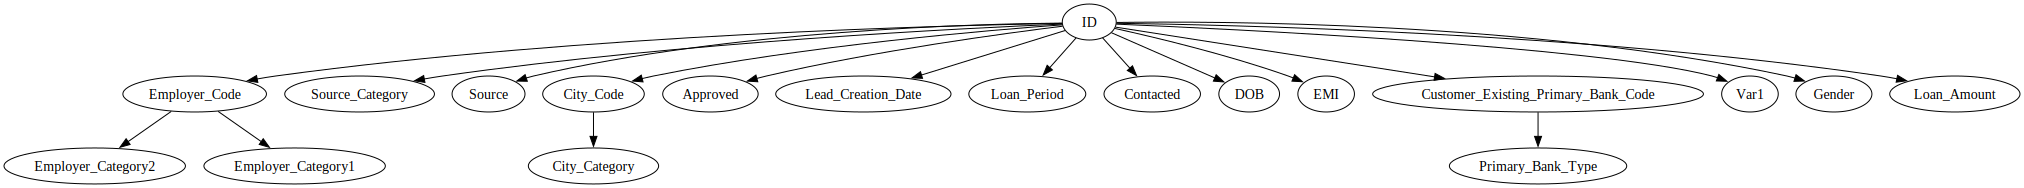

In [15]:
dia.plot_dependency()

/home/abstractqqq/Desktop/MY/Projects/polars_ds_extension/python/polars_ds/diagnosis.py:791: UserWarning: The following columns are dropped because they cannot be used in dependency detection: ['Monthly_Income', 'Existing_EMI', 'Interest_Rate']
  dep_frame = self.infer_dependency(subset=subset)


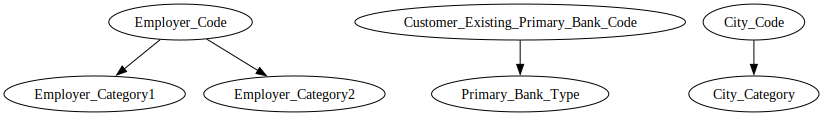

In [16]:
# ID implies everything, of course, because ID is unique.
# So let's not plot it
dia.plot_dependency(subset=pl.all().exclude("ID"))

In [17]:
# Basic stats about string columns
dia.str_stats()

column,null_count,n_unique,most_freq,most_freq_cnt,min_byte_len,min_char_len,avg_byte_len,avg_char_len,max_byte_len,max_char_len,5p_byte_len,95p_byte_len
str,u32,u32,str,u32,u32,u32,f64,f64,u32,u32,f64,f64
"""ID""",0,69713,"""APPC90493171225""",1,15,15,15.0,15.0,15,15,15.0,15.0
"""Gender""",0,2,"""Male""",39949,4,4,4.853901,4.853901,6,6,4.0,6.0
"""DOB""",15,10760,"""11/01/82""",253,8,8,8.0,8.0,8,8,8.0,8.0
"""Lead_Creation_Date""",0,92,"""02/09/16""",1838,8,8,8.0,8.0,8,8,8.0,8.0
"""City_Code""",814,679,"""C10001""",10007,6,6,6.0,6.0,6,6,6.0,6.0
…,…,…,…,…,…,…,…,…,…,…,…,…
"""Customer_Existing_Primary_Bank…",9391,58,"""B001""",14197,4,4,4.0,4.0,4,4,4.0,4.0
"""Primary_Bank_Type""",9391,3,"""P""",39619,1,1,1.0,1.0,1,1,1.0,1.0
"""Contacted""",0,2,"""Y""",45275,1,1,1.0,1.0,1,1,1.0,1.0


# Numerical EDA

In [18]:
df = pl.read_parquet("dependency.parquet")
df.head()


dia = DIA(df)

dia.numeric_profile(iqr_multiplier=2)

GT(_tbl_data=shape: (9, 13)
┌────────────┬────────────┬──────────┬────────────┬───┬──────────┬─────────┬───────────┬───────────┐
│ column     ┆ non_null_c ┆ null%    ┆ mean       ┆ … ┆ max      ┆ IQR     ┆ outlier_c ┆ histogram │
│ ---        ┆ nt         ┆ ---      ┆ ---        ┆   ┆ ---      ┆ ---     ┆ nt        ┆ ---       │
│ str        ┆ ---        ┆ f64      ┆ f64        ┆   ┆ f64      ┆ f64     ┆ ---       ┆ struct[1] │
│            ┆ u32        ┆          ┆            ┆   ┆          ┆         ┆ u32       ┆           │
╞════════════╪════════════╪══════════╪════════════╪═══╪══════════╪═════════╪═══════════╪═══════════╡
│ Employer_C ┆ 65415      ┆ 0.061653 ┆ 3.720187   ┆ … ┆ 4.0      ┆ 0.0     ┆ 7833      ┆ {[4298,   │
│ ategory2   ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 4258, …   │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 57582]}   │
│ Monthly_In ┆ 69713      ┆ 0.0      ┆ 5622.2832  ┆ … ┆ 3.8384e7 ┆ 2350.0  ┆ 3920      ┆ {[69699,  │
│ come       ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 5, … 1]}  │
│ Existing_E ┆ 69662      ┆ 0.000732 ┆ 360.928751 ┆ … ┆ 545436.5 ┆ 350.0   ┆ 6549      ┆ {[69655,  │
│ MI         ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 5, … 1]}  │
│ Loan_Amoun ┆ 42004      ┆ 0.397472 ┆ 39429.9828 ┆ … ┆ 300000.0 ┆ 30000.0 ┆ 1547      ┆ {[27709,  │
│ t          ┆            ┆          ┆ 59         ┆   ┆          ┆         ┆           ┆ 8646, …   │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 4]}       │
│ Loan_Perio ┆ 42004      ┆ 0.397472 ┆ 3.890629   ┆ … ┆ 6.0      ┆ 2.0     ┆ 0         ┆ {[27709,  │
│ d          ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 1886, …   │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 1]}       │
│ Interest_R ┆ 22276      ┆ 0.680461 ┆ 19.21357   ┆ … ┆ 37.0     ┆ 4.75    ┆ 2378      ┆ {[758,    │
│ ate        ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 2752, …   │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 240]}     │
│ EMI        ┆ 22276      ┆ 0.680461 ┆ 1101.46624 ┆ … ┆ 13556.0  ┆ 646.0   ┆ 1081      ┆ {[47437,  │
│            ┆            ┆          ┆ 2          ┆   ┆          ┆         ┆           ┆ 8179, …   │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 2]}       │
│ Var1       ┆ 69713      ┆ 0.0      ┆ 3.948446   ┆ … ┆ 10.0     ┆ 7.0     ┆ 0         ┆ {[23308,  │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 13363, …  │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 13420]}   │
│ Approved   ┆ 69713      ┆ 0.0      ┆ 0.014631   ┆ … ┆ 1.0      ┆ 0.0     ┆ 1020      ┆ {[68693,  │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 1020]}    │
└────────────┴────────────┴──────────┴────────────┴───┴──────────┴─────────┴───────────┴───────────┘, _body=<great_tables._gt_data.Body object at 0x759481c52ae0>, _boxhead=Boxhead([ColInfo(var='column', type=<ColInfoTypeEnum.stub: 2>, column_label='column', column_align='left', column_width=None), ColInfo(var='non_null_cnt', type=<ColInfoTypeEnum.default: 1>, column_label='non_null_cnt', column_align='center', column_width=None), ColInfo(var='null%', type=<ColInfoTypeEnum.default: 1>, column_label='null%', column_align='right', column_width=None), ColInfo(var='mean', type=<ColInfoTypeEnum.default: 1>, column_label='mean', column_align='right', column_width=None), ColInfo(var='std', type=<ColInfoTypeEnum.default: 1>, column_label='std', column_align='right', column_width=None), ColInfo(var='min', type=<ColInfoTypeEnum.default: 1>, column_label='min', column_align='right', column_width=None), ColInfo(var='q1', type=<ColInfoTypeEnu

In [19]:
df.head()

ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
str,str,str,str,str,str,str,str,i64,f64,str,str,str,str,str,f64,i64,i64,f64,i64,i64,i64
"""APPC90493171225""","""Female""","""23/07/79""","""15/07/16""","""C10001""","""A""","""COM0044082""","""A""",4,2000.0,"""B001""","""P""","""N""","""S122""","""G""",0.0,null,null,null,null,0,0
"""APPD40611263344""","""Male""","""07/12/86""","""04/07/16""","""C10003""","""A""","""COM0000002""","""C""",1,3500.0,"""B002""","""P""","""Y""","""S122""","""G""",0.0,20000,2,13.25,953,10,0
"""APPE70289249423""","""Male""","""10/12/82""","""19/07/16""","""C10125""","""C""","""COM0005267""","""C""",4,2250.0,"""B003""","""G""","""Y""","""S143""","""B""",0.0,45000,4,null,null,0,0
"""APPF80273865537""","""Male""","""30/01/89""","""09/07/16""","""C10477""","""C""","""COM0004143""","""A""",4,3500.0,"""B003""","""G""","""Y""","""S143""","""B""",0.0,92000,5,null,null,7,0
"""APPG60994436641""","""Male""","""19/04/85""","""20/07/16""","""C10002""","""A""","""COM0001781""","""A""",4,10000.0,"""B001""","""P""","""Y""","""S134""","""B""",2500.0,50000,2,null,null,10,0


In [20]:
import polars.selectors as cs

dia.corr(subset=["Monthly_Income", "Existing_EMI"])

column,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Monthly_Income""",0.001546,1.0,0.245826,0.039998,-0.003671,-0.014789,0.035163,0.024854,0.000472
"""Existing_EMI""",-0.017074,0.245826,1.0,0.008653,-0.004603,-0.023001,0.000813,0.00662,0.027821


In [21]:
dia.corr(subset=cs.all(), method="spearman")

column,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""ID""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Gender""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""DOB""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Lead_Creation_Date""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""City_Code""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
…,…,…,…,…,…,…,…,…,…
"""Loan_Period""",-0.007449,-0.003671,-0.004603,0.379921,1.0,-0.096629,0.083965,-0.065702,-0.000375
"""Interest_Rate""",0.177605,-0.014789,-0.023001,-0.321095,-0.096629,1.0,-0.241648,-0.554138,-0.094387
"""EMI""",-0.051729,0.035163,0.000813,0.916832,0.083965,-0.241648,1.0,0.293474,0.050129


In [22]:
dia.plot_corr(subset=["Monthly_Income", "Existing_EMI"], method="spearman")

column,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
Monthly_Income,0.002,1.000,0.246,0.040,−0.004,−0.015,0.035,0.025,0.000
Existing_EMI,−0.017,0.246,1.000,0.009,−0.005,−0.023,0.001,0.007,0.028


In [23]:
dia.plot_corr(subset=["Monthly_Income", "Existing_EMI"], method="xi")

column,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
Monthly_Income,0.002,1.000,0.246,0.040,−0.004,−0.015,0.035,0.025,0.000
Existing_EMI,−0.017,0.246,1.000,0.009,−0.005,−0.023,0.001,0.007,0.028


In [24]:
# Checks whether nulls in one feature happens at the same time as nulls in other features, or if
# nulls happen only when some feature is small / high (by sorting the df.)
# Sort is optional.
# This first sorts the df in DIA by 'Monthly_Income', then groups every `row_group_size` rows together.
# E.g. first 10_000 rows become row gorup 1 (the first bin), etc, etc., and then computes the null rate
# in each row group.

# In this example, we can see that lower monthly income population tend to have high loan amount null rate
# and that loan amount nulls correspond to loan period nulls (and much more.)
dia.plot_null_distribution(
    cs.numeric(), 
    row_group_size=5_000,
    sort = "Monthly_Income"
)

GT(_tbl_data=shape: (9, 4)
┌────────────────────┬────────────────────────────────┬──────────┬───────┐
│ column             ┆ percentages in row groups      ┆ null%    ┆ total │
│ ---                ┆ ---                            ┆ ---      ┆ ---   │
│ str                ┆ struct[1]                      ┆ f64      ┆ i32   │
╞════════════════════╪════════════════════════════════╪══════════╪═══════╡
│ Employer_Category2 ┆ {[0.121, 0.003, … 0.046467]}   ┆ 0.061653 ┆ 69713 │
│ Monthly_Income     ┆ {[0.0, 0.0, … 0.0]}            ┆ 0.0      ┆ 69713 │
│ Existing_EMI       ┆ {[0.0, 0.0, … 0.000849]}       ┆ 0.000732 ┆ 69713 │
│ Loan_Amount        ┆ {[0.976, 0.757, … 0.267346]}   ┆ 0.397472 ┆ 69713 │
│ Loan_Period        ┆ {[0.976, 0.757, … 0.267346]}   ┆ 0.397472 ┆ 69713 │
│ Interest_Rate      ┆ {[0.9892, 0.8522, … 0.645237]} ┆ 0.680461 ┆ 69713 │
│ EMI                ┆ {[0.9892, 0.8522, … 0.645237]} ┆ 0.680461 ┆ 69713 │
│ Var1               ┆ {[0.0, 0.0, … 0.0]}            ┆ 0.0      ┆ 69713 │
│ Approved           ┆ {[0.0, 0.0, … 0.0]}            ┆ 0.0      ┆ 69713 │
└────────────────────┴────────────────────────────────┴──────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x75944cb72390>, _boxhead=Boxhead([ColInfo(var='column', type=<ColInfoTypeEnum.stub: 2>, column_label='column', column_align='left', column_width=None), ColInfo(var='percentages in row groups', type=<ColInfoTypeEnum.default: 1>, column_label='percentages in row groups', column_align='center', column_width=None), ColInfo(var='null%', type=<ColInfoTypeEnum.default: 1>, column_label='null%', column_align='right', column_width=None), ColInfo(var='total', type=<ColInfoTypeEnum.default: 1>, column_label='total', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x75944cb3bfe0>, _spanners=Spanners([]), _heading=Heading(title='Null Distribution', subtitle=None, preheader=None), _stubhead='column', _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x75944cb71880>, _formats=[<great_tables._gt_data.FormatInfo object at 0x75944cb72a80>, <great_tables._gt_data.FormatInfo object at 0x75944cb72870>, <great_tables._gt_data.FormatInfo object at 0x75944cb72720>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', t

In [25]:
# Additionally you can have a filter that is applied before row group assignments.
dia.plot_null_distribution(
    cs.numeric(), 
    filter_by= (pl.col("Source_Category") == 'B'),
    row_group_size = 1000
)

GT(_tbl_data=shape: (9, 4)
┌────────────────────┬──────────────────────────────┬──────────┬───────┐
│ column             ┆ percentages in row groups    ┆ null%    ┆ total │
│ ---                ┆ ---                          ┆ ---      ┆ ---   │
│ str                ┆ struct[1]                    ┆ f64      ┆ i32   │
╞════════════════════╪══════════════════════════════╪══════════╪═══════╡
│ Employer_Category2 ┆ {[0.008, 0.009, … 0.006158]} ┆ 0.005199 ┆ 29812 │
│ Monthly_Income     ┆ {[0.0, 0.0, … 0.0]}          ┆ 0.0      ┆ 29812 │
│ Existing_EMI       ┆ {[0.0, 0.0, … 0.0]}          ┆ 0.000034 ┆ 29812 │
│ Loan_Amount        ┆ {[0.389, 0.401, … 0.432266]} ┆ 0.397256 ┆ 29812 │
│ Loan_Period        ┆ {[0.389, 0.401, … 0.432266]} ┆ 0.397256 ┆ 29812 │
│ Interest_Rate      ┆ {[0.678, 0.669, … 0.731527]} ┆ 0.690326 ┆ 29812 │
│ EMI                ┆ {[0.678, 0.669, … 0.731527]} ┆ 0.690326 ┆ 29812 │
│ Var1               ┆ {[0.0, 0.0, … 0.0]}          ┆ 0.0      ┆ 29812 │
│ Approved           ┆ {[0.0, 0.0, … 0.0]}          ┆ 0.0      ┆ 29812 │
└────────────────────┴──────────────────────────────┴──────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x75944cb73050>, _boxhead=Boxhead([ColInfo(var='column', type=<ColInfoTypeEnum.stub: 2>, column_label='column', column_align='left', column_width=None), ColInfo(var='percentages in row groups', type=<ColInfoTypeEnum.default: 1>, column_label='percentages in row groups', column_align='center', column_width=None), ColInfo(var='null%', type=<ColInfoTypeEnum.default: 1>, column_label='null%', column_align='right', column_width=None), ColInfo(var='total', type=<ColInfoTypeEnum.default: 1>, column_label='total', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x75944f5d73b0>, _spanners=Spanners([]), _heading=Heading(title='Null Distribution', subtitle=None, preheader=None), _stubhead='column', _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x75944cb732f0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x75944cb70140>, <great_tables._gt_data.FormatInfo object at 0x75944cb70710>, <great_tables._gt_data.FormatInfo object at 0x75944cb71220>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), ta

In [26]:
# Plot a single feature's distribution, together with useful stats
df_bins, plot = dia.plot_dist(
    "EMI", 
    n_bins=100, 
    density=False, 
)
plot

alt.VConcatChart(...)

In [27]:
# Plot is an Altair's chart object, so you can do a lot with it (but has some restriction)
# Here we can turn the plot into an interactive one
plot.interactive()

alt.VConcatChart(...)

In [28]:
# Again, you can provide a filter expression, which will be applied upfront
# You can see how because of this filter expression, null and extreme values are removed
df_bins, plot = dia.plot_dist(
    "EMI", 
    n_bins=100, 
    density=False, 
    filter_by = pl.col("EMI").is_between(pl.col("EMI").quantile(0.01), pl.col("EMI").quantile(0.99)),
)
plot

alt.VConcatChart(...)

In [29]:
dia.compare_dist_on_segment(
    "EMI", 
    by = "Primary_Bank_Type",
    # (pl.col("Loan_Amount") > 10_000).alias("high_loan_amount"), # The segment we want to use
    n_bins=100, 
    density=True, 
)

alt.VConcatChart(...)

# Classic Iris Dataset

In [30]:
import polars as pl
import polars_ds as pds
from polars_ds.diagnosis import DIA
# Only used to get dataset.
from sklearn import datasets


dataset = datasets.load_iris()
df = pl.from_numpy(dataset.data, schema = dataset.feature_names).with_columns(
    pl.Series(values=dataset.target).alias("species")
).with_columns(
    pl.when(pl.col("species") == 0).then(pl.lit('setosa'))
    .when(pl.col("species") == 1).then(pl.lit('versicolor'))
    .when(pl.col("species") == 2).then(pl.lit('virginica')).alias("species")
)
df.head()

sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""setosa"""
4.9,3.0,1.4,0.2,"""setosa"""
4.7,3.2,1.3,0.2,"""setosa"""
4.6,3.1,1.5,0.2,"""setosa"""
5.0,3.6,1.4,0.2,"""setosa"""


In [31]:
dia = DIA(df)
dia.plot_pca(
    pl.all().exclude("species"), 
    by = "species",
    dim = 2
).interactive()

alt.Chart(...)

In [33]:
# Just for fun, let's see how well can sepal length approximate petal length

plot = dia.plot_lin_reg(
    x = "sepal length (cm)", 
    target = "petal length (cm)", 
    add_bias=True,
)
plot


alt.LayerChart(...)

In [34]:
# The plot is an Altair plot, you can do a lot of cool things from here. For more details, 
# visit Altair's official docs!
plot.interactive()

alt.LayerChart(...)

In [35]:
dia.plot_lin_reg(
    x = "sepal length (cm)", 
    target = "petal length (cm)", 
    add_bias=True,
    by = "species",
    # weights = "petal width (cm)" # Optional
)

alt.VConcatChart(...)